## **Digit Classification using MNIST Dataset**

#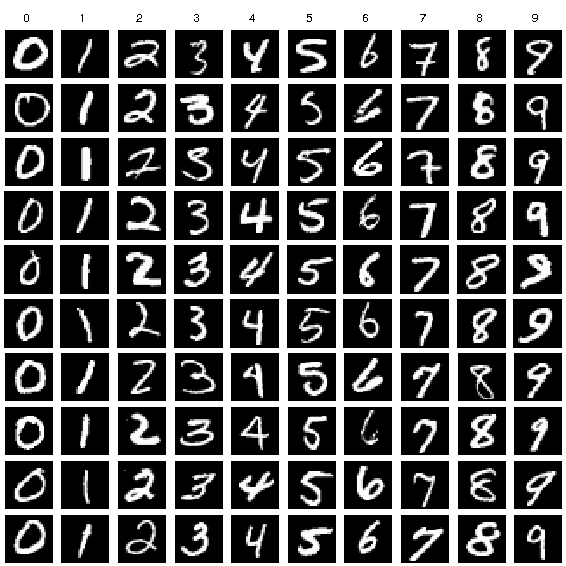 

### An Overview of the Dataset

The **MNIST** (Modified **National Institite of Standards and Technology** database) contains 70000 samples of handwritten digits. Each image is manually labelled with the digit it represents. 

#### Fetching the Data

In [1]:
from sklearn.datasets import fetch_openml
# sci-kit learn's fetch_openml we can import the datasets into our local systems.
# Datasets are uniquely identified by either an integer ID or by a combination of name and version 

In [2]:
mnist = fetch_openml(name = "mnist_784", version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])



*   **data** : The feature matrix. Categorical features are encoded as ordinals.
*   **target** : The regression target or classification labels
*   **feature_names** : The names of the dataset columns
*   **DESCR** : The full description of the dataset
*   **details** : more metadata from OPEN ML
*   **categories** : Maps each categorical feature name to a list of values, such that the value encoded as i is ith in the list.



In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## With this backend, the output of plotting commands is displayed 
## inline within frontends like the Jupyter notebook, directly below 
## the code cell that produced it. The resulting plots will then also 
## be stored in the notebook document.

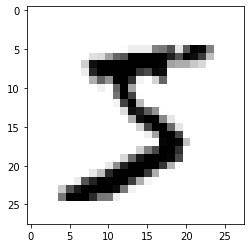

5
* * * * * * * * * * * * * * * * * * * * * *


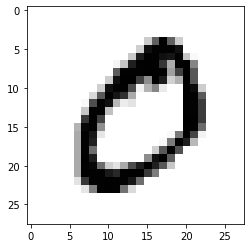

0
* * * * * * * * * * * * * * * * * * * * * *


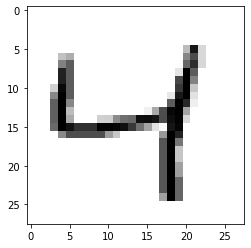

4
* * * * * * * * * * * * * * * * * * * * * *


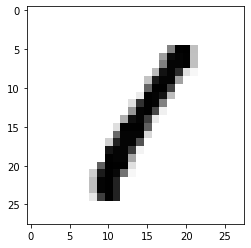

1
* * * * * * * * * * * * * * * * * * * * * *


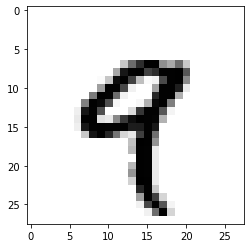

9
* * * * * * * * * * * * * * * * * * * * * *


In [6]:
### Showing the first 5 instances of the data set
for i in range(5):
    digit = X[i]
    image_digit = digit.reshape(28, 28)
    
    plt.imshow(image_digit, cmap = mpl.cm.binary, interpolation = 'nearest')
    plt.axis = ("off")
    plt.show()
    print(y[i])
    print("* * * * * * * * * * * * * * * * * * * * * *")

In [7]:
type(y[0])

str

In [8]:
#converting the label set y to integer data type
import numpy as np
y = y.astype(np.uint8)

## Creating Training and Testing Set

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

#### For Example: 5 or Not 5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## y_train_5 and y_test_5 state true for all "5"s and 
## FALSE for any number other than 5

In [11]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter = 1000, random_state=50)
## max_iter --> maximum number of iterations over the training data

sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=50, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### **Why a SGD Classifier ?**

Stochastic Gradient Descent (SGD) classifier basically implements a plain SGD learning routine supporting various loss functions and penalties for classification. Scikit-learn provides SGDClassifier module to implement SGD classification. This classifier has the advantage of being capable of handling very large datasets efficiently.




```
# This is formatted as code
```

### **What is "Stoichastic" Gradient Descent?**



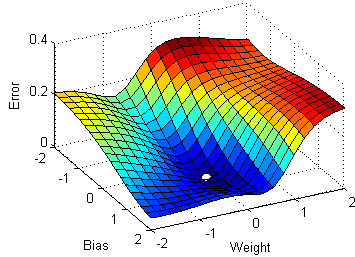

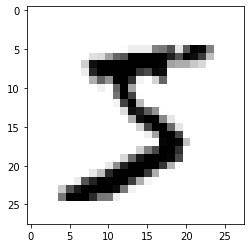

5
[ True]
* * * * * * * * * * * * * * * * * * * * * *


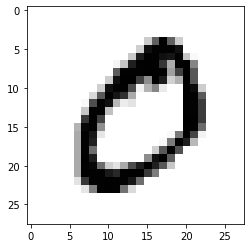

0
[False]
* * * * * * * * * * * * * * * * * * * * * *


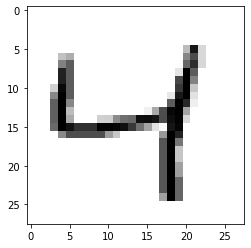

4
[False]
* * * * * * * * * * * * * * * * * * * * * *


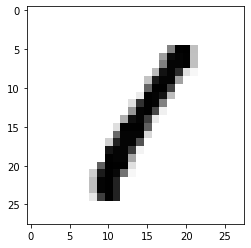

1
[False]
* * * * * * * * * * * * * * * * * * * * * *


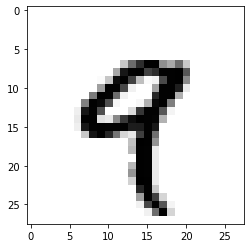

9
[False]
* * * * * * * * * * * * * * * * * * * * * *


In [12]:
for i in range(5):
    dig = X[i]
    img_dig = dig.reshape(28, 28)
    
    plt.imshow(img_dig, cmap = mpl.cm.binary, interpolation = 'nearest')
    plt.axis = ("off")
    plt.show()
    
    print(y[i])
    
    print(sgd.predict([dig]))

    print("* * * * * * * * * * * * * * * * * * * * * *")

## **Evaluating the Performace Measures**

In [13]:
from sklearn.model_selection import StratifiedKFold
#performs stratified sampling to produce k folds that contain a 
#representative ratio of each class

from sklearn.base import clone

### Implementing K-Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The general procedure is as follows:



For each unique group:

1.   Shuffle the dataset randomly.
2.   Split the dataset into k groups
3.   For Each of the K groups:

> * Take the group as a hold out or test data set
> * Take the remaining groups as a training data set
> * Fit a model on the training set and evaluate it on the test set
> * Retain the evaluation score and discard the model

4. Summarize the skill of the model using the sample of model evaluation scores

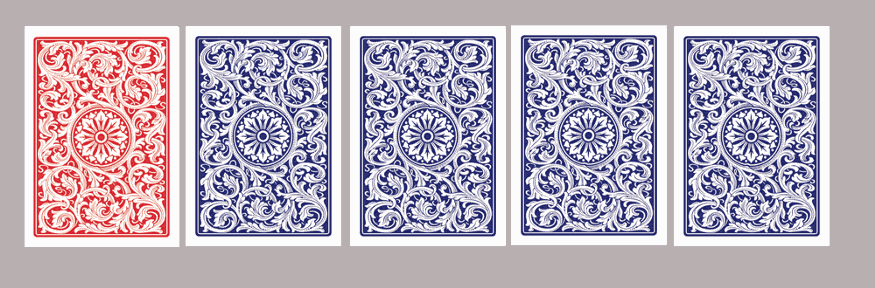

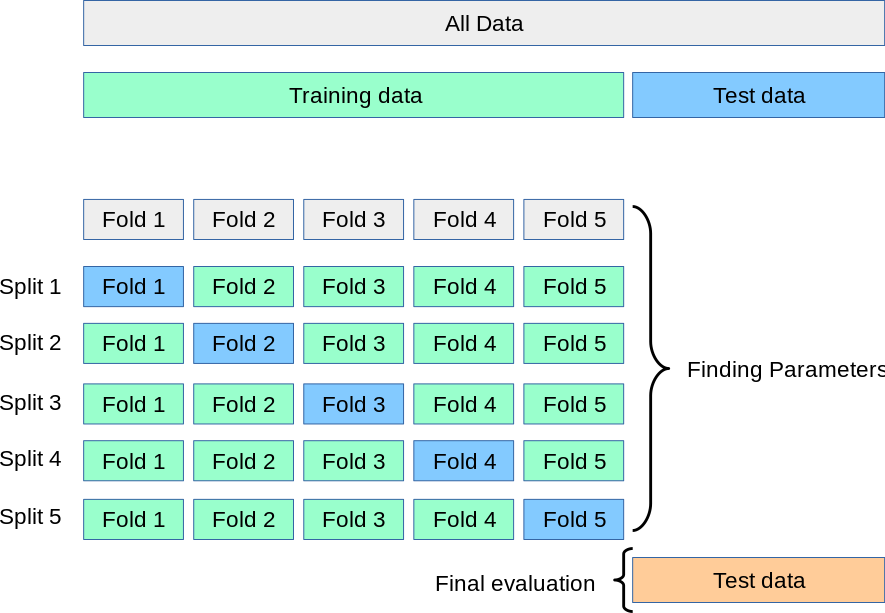

In [14]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 50)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    ## Cloning the SGD classifier
    cloned_classifier = clone(sgd)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train[test_index]
    
    
    cloned_classifier.fit(X_train_folds, y_train_folds)
    y_pred = cloned_classifier.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct * 10 / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9915
0.966
0.962


In [15]:
from sklearn.model_selection import cross_val_score
## cross_val_score returns the validation score 

cross_val_score(sgd, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.96675, 0.96705, 0.9569 ])

### **Confusion Matrix**

General Idea : Count the number of times members of Class A  got classified as Class B 

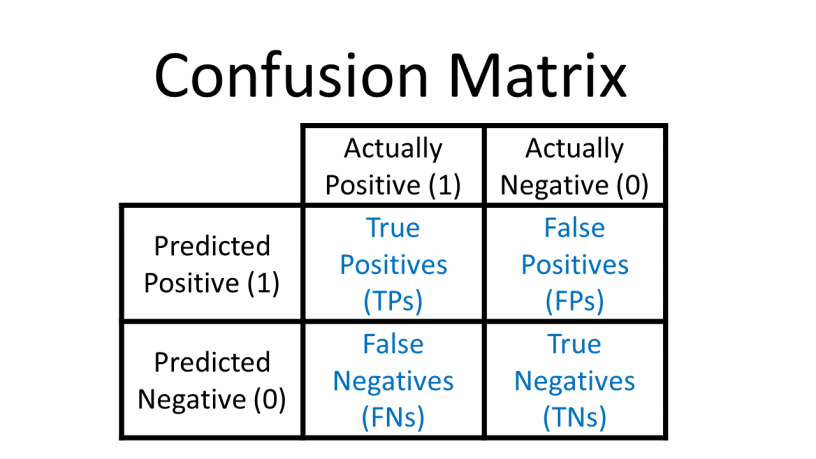

Unlike its name "Confusion Matrix" it is pretty simple and interesting to understand and helps in measuring the performance of our model.

Consider it as a graph between the Actual Values and the Predicted Values
*   Columns represent **Actual** values
*   Rows represent **Predicted** values

**True Positives(TP)** : The predicted value matches the actual value. The actual value was positive and model predicted it to be positive.

**True Negative(TN)** : The predicted value matches the actual value. The actual value was negative and model predicted it to be negative.

**False Positives(FP)** : The predicted value was falsely predicted. The actual value was negative but the model predicted it to be posiive. **[Type 1 Error]**

**False Negative(FN)** : The predicted value was falsely predicted. The actual value was psotive but the model predicted it to be negative **[Type 2 Error]**

In [16]:
from sklearn.model_selection import cross_val_predict
#instead of returning evaluation scores it returns predictions made on each fold

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_5, y_train_pred)
conf_matrix

array([[53519,  1060],
       [ 1126,  4295]])

### **Calculating Precision, Recall & F1 Score**

 $$precision  = \frac{TP}{TP 
+ FP} \\ $$
$$recall  = \frac{TP}{TP 
+ FN} \\ $$ 
$$ F1 score  = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}} \\ $$

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("precision :",  precision_score(y_train_5, y_train_pred))

print("recall :", recall_score(y_train_5, y_train_pred))

print("F1_score :", f1_score(y_train_5, y_train_pred))

precision : 0.8020541549953315
recall : 0.7922892455266556
F1_score : 0.7971417965850038


**Precision** : It tells us how many of the correctly predicted cases actually turn out to be positive.
(80.2% of the times teh predictions were correct)

**Recall** : Also caled the *sensitivity* or *True Positive Rate(TPR)* is the ratio of positive instances that are correctly detected by a classifier.
(79.2% of the time )

**F1_Score** : A convinient way to combine precision and recall. It is the harmonic mean of Precision and Recall and unlike a regular mean it doesnt treat all values equally and gives more weightage to the low values. As a result a classifier would generate a high F1 Score if both Precision and Recall are high

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "r-", label = "precision")
    plt.plot(thresholds, recalls[:-1], "b-", label = "recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                                                 

In [20]:
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv = 3, method = "decision_function")

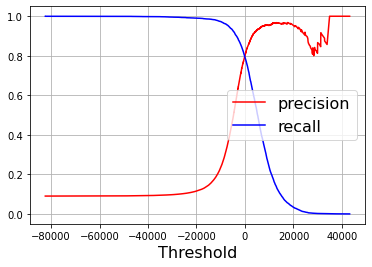

In [21]:
from sklearn.metrics import precision_recall_curve 
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## **AUC - ROC Curve**
**ROC**(*Reciever Operating Characteristics*) is a probability curve and **AUC**(*Area under the Curve*) measures the degree of separability
It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called *specificity*. Hence the ROC curve plots *sensitivity* (recall) versus
*1 – specificity*.



#### **Defining the Terms involved**
$$True Positive Rate/ Recall/ Sensitivity   = \frac{TP}{TP 
+ FN} \\ $$

$$ Specificity   = \frac{TN}{TN 
+ FP} \\ $$

$$ False Positive Rate  = 1 - Specificity
 =  \frac{FP}{TN 
+ FP} \\ $$




In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [23]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=15)
    plt.ylabel('True Positive Rate (Recall)', fontsize=15)
    plt.grid(True)   

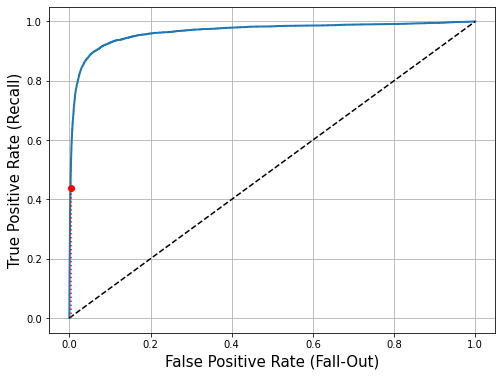

In [24]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")                                      # Not shown
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.965984097238232

#### **Well, What does the ROC_AUC score imply??**

When *0.5 < AUC < 1* ,  there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.


This way when we are in trial mode we can try fitting our model to different classifiers say in this case we could have used Support Vector Machines or Decision Tree Classifier, KNN for classification and calculate the respective ROC scores. The one with higher ROC is probably the better classifier for the given problem statement



In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 50)
y_probas_forest = cross_val_predict(forest, X_train, y_train_5, cv = 3, method = "predict_proba")

In [27]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

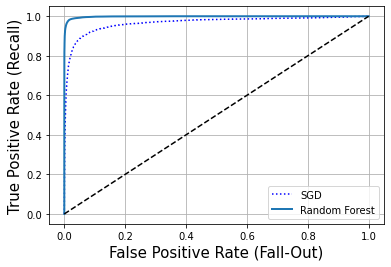

In [28]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [29]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983625545601512

## **First Milestone Achieved!!!!**

## **Multiclass Classification**

So until now, we gained a few knowledge on making a model that could classify between two different things, in our case it was **5 vs Not 5** Classifier. Now that we have made our machine understand how to differentiate between two different things we are at a decent stage to step up for making a multiclass classification i.e. Classiflying all the digits into their respective classes.



**Types of Classification Strategies**
1. *One Vs All Strategy* : OVA decomposition divide an **N** class problem into **N** binary problems. Each problem is face up by a binary classifier which is responsible of distinguishing one of the classes from all other classes. The learning step of the classifiers is done using the whole training data, considering the patterns from the single class as positives and all other examples as negatives.

2. *One Vs One Strategy* : This scheme decomposes the problem by training the model to distnguish in pairs i.e. 0s and 1s, 0s and 2s and so on and then 1s and 2s and 1s and 3s and so on. So for **N** classes we need to train **$$\frac{N*(N-1)}{2}$$** classifiers.

In [30]:
sgd.fit(X_train, y_train)
sgd.predict([X[1]])

array([0], dtype=uint8)

In [31]:
digit_scores = sgd.decision_function([X[1]])
digit_scores

array([[ 31724.66376986, -38087.1928854 ,  -9766.43607253,
         -7362.47081766, -29231.04302745,  -8760.24417299,
        -17313.23472841, -14844.36032108,  -3977.48213372,
         -7953.2596097 ]])

**How did  SGD work for Multiclass Classification?**


Here SGD works as an One vs All Classifier. Scikit Learn automatically detects when we try to use a binary classifier for a multi class classification task. Its runs the OVA scheme automatically except for some trictly binary classifiers like SVM.

In [32]:
np.argmax(digit_scores)
## returns the index of the predicted class

0

In [33]:
sgd.classes_
## list of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 50))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=50, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [35]:
ovo_clf.predict([X[0]])

array([5], dtype=uint8)

In [42]:
len(ovo_clf.estimators_)

45

**How did  OvO work for Multiclass Classification?**

It forcibly uses the OVO strategy for the given multiclass classification statement.


### **Training a Random forest CLassifier** 

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

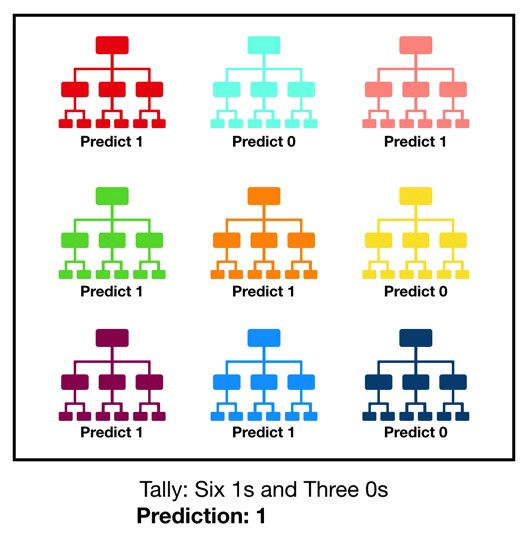

**Well, Whats a decision Tree now??** 

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [43]:
forest.fit(X_train, y_train)
forest.predict([X[0]])

array([5], dtype=uint8)

In [44]:
forest.predict([X[0]])

array([5], dtype=uint8)

In [45]:
forest.predict_proba([X[0]])

array([[0.01, 0.01, 0.01, 0.06, 0.  , 0.89, 0.01, 0.  , 0.01, 0.  ]])

In [46]:
cross_val_score(sgd, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87145, 0.864  , 0.8742 ])

In [47]:
cross_val_score(forest, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.9655 , 0.96405, 0.9659 ])

We recieved  above 85% cross validation score using a SGD classifier. On the other hand the Random Forest Classifier out formed the former one by 10% which is a pretty decent result!


For further increment in the performance of our model we can use Scaling. 

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [51]:
y_train_pred_sgd = cross_val_score(sgd, X_train_scaled, y_train, cv = 3, scoring = "accuracy")
y_train_pred_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8998 , 0.89255, 0.9088 ])

In [52]:
y_train_pred_forest = cross_val_score(forest, X_train_scaled, y_train, cv = 3, scoring = "accuracy")
y_train_pred_forest

array([0.96555, 0.964  , 0.9658 ])

## Error Analysis

In [54]:
y_pred_sgd = cross_val_predict(sgd, X_train_scaled, y_train, cv = 3)
y_pred_forest = cross_val_predict(forest, X_train_scaled, y_train, cv = 3)
conf_mx_sgd = confusion_matrix(y_train, y_pred_sgd)
conf_mx_forest =  confusion_matrix(y_train, y_pred_forest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


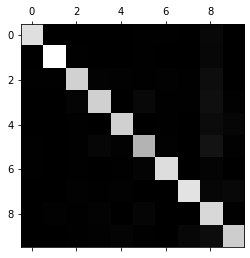

In [55]:
plt.matshow(conf_mx_sgd, cmap = plt.cm.gray)
plt.show()

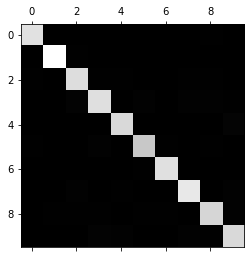

In [56]:
plt.matshow(conf_mx_forest, cmap = plt.cm.gray)
plt.show()

In [59]:
row_sums = conf_mx_sgd.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx_sgd / row_sums

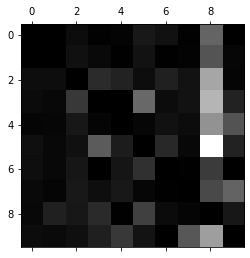

In [60]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

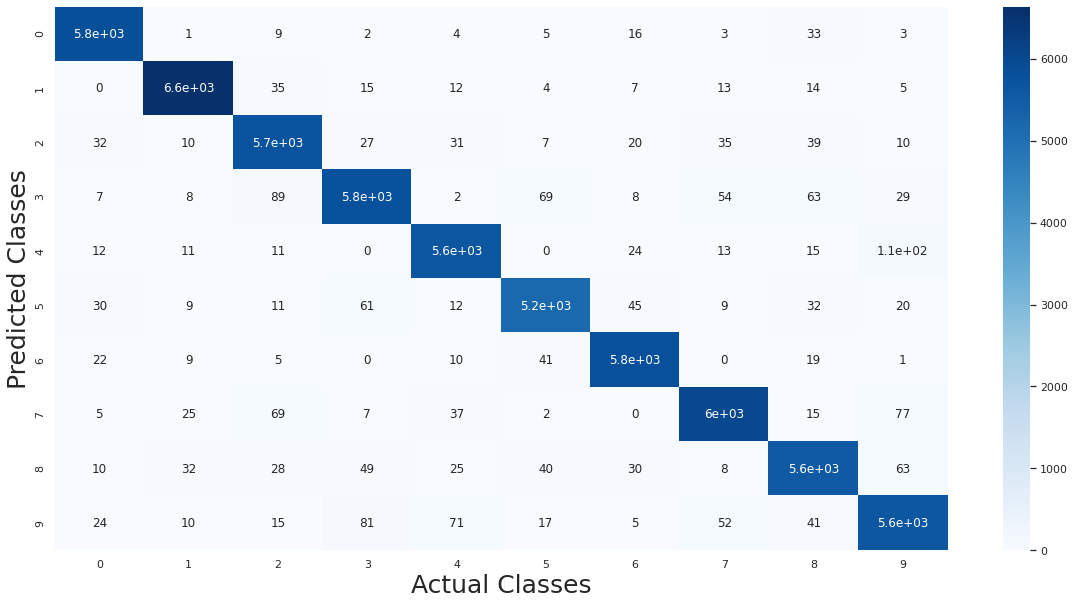

In [82]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(conf_mx_forest, annot = True, cmap = "Blues")
plt.xlabel("Actual Classes", fontsize = 25)
plt.ylabel("Predicted Classes", fontsize = 25)
plt.show()

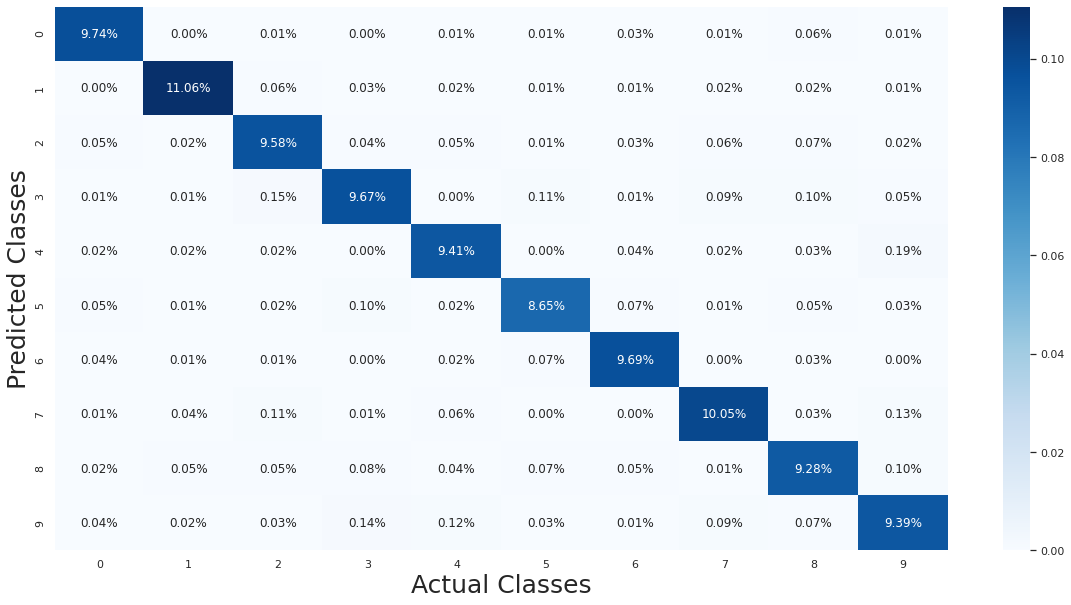

In [83]:
sns.heatmap(conf_mx_forest/np.sum(conf_mx_forest), annot=True, 
            fmt='.2%', cmap='Blues')

plt.xlabel("Actual Classes", fontsize = 25)
plt.ylabel("Predicted Classes", fontsize = 25)

plt.show()